In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

## Step 1: Load the Data

In [62]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, header=None, names=column_names)

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Preprocess the Data

In [63]:
iris_data = iris_data.sample(frac=1, random_state=42).reset_index(drop=True)

X = iris_data.iloc[:, :-1].values  # Input features
y = iris_data.iloc[:, -1].values   # Target labels

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_normalized = X / np.max(X, axis=0)

print("Input features shape:", X_normalized.shape)
print("Target labels shape:", y_categorical.shape)

Input features shape: (150, 4)
Target labels shape: (150, 3)


## Step 3: Build the Neural Network Model

In [64]:
# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

C:\Users\ilmar\PycharmProjects\Neuroverkot\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 4: Train the Model

In [65]:
# Train the model with validation split
history = model.fit(X_normalized, y_categorical, epochs=50, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3997 - loss: 1.1341 - val_accuracy: 0.6000 - val_loss: 1.0258
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 0.9952 - val_accuracy: 0.6333 - val_loss: 0.8985
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 0.8411 - val_accuracy: 0.6667 - val_loss: 0.7538
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.6809 - val_accuracy: 0.9333 - val_loss: 0.6238
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.5870 - val_accuracy: 0.8667 - val_loss: 0.5231
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4239 - val_accuracy: 1.0000 - val_loss: 0.4787
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.4213 - val_accuracy: 0.9333 - val_loss: 0.4029
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9181 - loss: 0.3550 - val_accuracy: 1.0000 - val_loss:

## Step 5: Evaluate the Model

In [66]:
# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(X_normalized, y_categorical)
print(f'Training accuracy: {train_acc:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9633 - loss: 0.0678  
Training accuracy: 0.97


## Step 6: Plot Training and Validation Accuracy

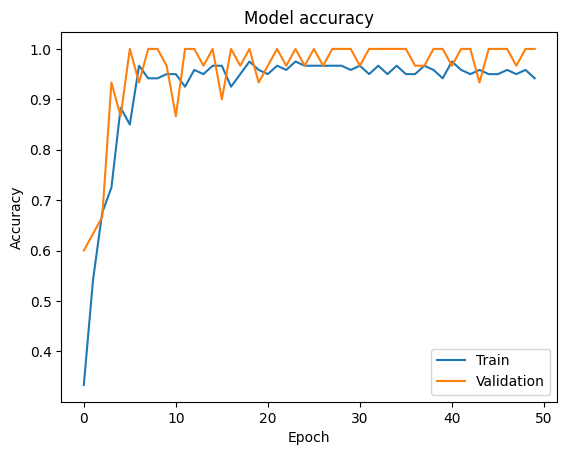

In [67]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()